In [18]:
import scanpy as sc
import anndata
import anndata as ad
import pandas as pd 
import numpy as np
from SCluster import SCluster
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import fowlkes_mallows_score

plt.rcParams['figure.dpi']=300
sc.set_figure_params(fontsize=10)


In [19]:
adata=anndata.read('/nfs_genome1/wanxinjiang/SCluster/datasets/Retina.h5ad')

In [20]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [21]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [22]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [23]:
adata.raw=adata

In [24]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata= adata[:, adata.var.highly_variable]

In [25]:
adata

View of AnnData object with n_obs × n_vars = 7530 × 3499
    obs: 'annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [26]:
adata=SCluster(adata=adata,\
                     cidr=True,sharp=True,scanpy=True,soup=True,seurat=True,simlr=True,RaceID3=True)

Performing SCluster clustering... 
Start estimate number of clusters ...
The number of Clusters is 10.
Raw expression
7530 samples 17565 features

After selecting highly variable
7530 samples 3499 features

Start SIMLR clustering...
Start Seurat clustering...
Start RaceID3 clustering...
Start SOUP clustering...
Start CIDR clustering...
Start SHARP clustering...
Start Scanpy  clustering...
Scanpy done.
Performing fast PCA.
Performing k-nearest neighbour search.
Computing the multiple Kernels.
Performing the iterative procedure  5  times.
Iteration:  1 
Iteration:  2 
Iteration:  3 
Iteration:  4 
Iteration:  5 
Performing Kmeans.
Performing t-SNE.


corrupted size vs. prev_size


-----------------------------------------------------------------------
Data info:
Number of cells: 7530 
Number of genes: 3499 
-----------------------------------------------------------------------
Preprocessing:
Normalization...
The maximum Silhouette index is 0.1877281 
The optimal number of clusters for individual RP is:  12 
The maximum Silhouette index is 0.1581817 
The optimal number of clusters for individual RP is:  2 
Log-transform is necessary!
-----------------------------------------------------------------------
Parameter Setting:
Using SHARP_large...
Ensemble size: 5 
The dimension has been reduced from 3499 to 322 
Partition block size: 2000 
-----------------------------------------------------------------------
Analysis starts...
Reshuffling the order of single cells...
The number of cells in Folds 1 2 3 4 are: 2000 2000 1765 1765 
Process 3987285----Random Projection: 1 out of 5, Fold: 1 out of 4, Cell Number: 2000
Process 3987312----Random Projection: 1 out of 5, 

Error in cluster::pam(as.dist(sdata), k, diss = TRUE) : 
  NA values in the dissimilarity matrix not allowed.
此外: Warning message:
In cor(t(x), method = method) : 标准差为零


SOUP done.
CIDR done.
Seurat done.
RaceID3 erro.
SIMLR erro.
seurat 7 cidr
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The retained adata of the first clustering...
AnnData object with n_obs × n_vars = 2362 × 3499
    obs: 'annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sort', 'soup', 'cidr', 'sharp', 'scanpy', 'seurat', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
adata.write('/nfs_genome1/wanxinjiang/SCluster/results/SCluster_Retina.h5ad',compression='gzip')

In [28]:
def evaluate(true_labels,pre_labels):
    ari=''
    h_score=''
    nmi=''
    ## ARI ##
    ari=adjusted_rand_score(true_labels,pre_labels)
    ## homogeneity_score ##
    # h_score=homogeneity_score(true_labels,pre_labels)
    ## NMI ##
    nmi=normalized_mutual_info_score(true_labels,pre_labels)
    ##  FM ## 
    fm=fowlkes_mallows_score(true_labels,pre_labels)
    return [ari,nmi,fm]

In [29]:
eva=[]
SCluster_eva=evaluate(adata.obs['annotation'],adata.obs["SCluster"])
eva.append(['SCluster',SCluster_eva])
try:
    soup=evaluate(adata.obs['annotation'],adata.obs["soup"])
    eva.append(["soup",soup])
except:
    pass

try:
    sharp=evaluate(adata.obs['annotation'],adata.obs["sharp"])
    eva.append(["sharp",sharp])
except:
    pass

try:
    scanpy=evaluate(adata.obs['annotation'],adata.obs["scanpy"])
    eva.append(["scanpy",scanpy])
except:
    pass

try:
    seurat=evaluate(adata.obs['annotation'],adata.obs["seurat"])
    eva.append(["seurat",seurat])
except:
    pass

try:
    sc3=evaluate(adata.obs['annotation'],adata.obs["sc3"])
    eva.append(["sc3",sc3])
except:
    pass

try: 
    sincera=evaluate(adata.obs['annotation'],adata.obs["sincera"])
    eva.append(["sincera",sincera])
except:
    pass

try:
    cidr=evaluate(adata.obs['annotation'],adata.obs["cidr"])
    eva.append(["cidr",cidr])
except:
    pass

try:
    simlr=evaluate(adata.obs['annotation'],adata.obs["simlr"])
    eva.append(['simlr',simlr])
except:
    pass

try:
    RaceID3=evaluate(adata.obs['annotation'],adata.obs["RaceID3"])
    eva.append(['RaceID3',RaceID3])
except:
    pass

_methods=[]
_eva=[]
for i in eva:
    _methods.append(i[0])
    _eva.append(i[1])
eva_d=pd.DataFrame(_eva)
eva_d.columns=['ARI','NMI','FM']
eva_d.index=_methods
eva_d

,ARI,NMI,FM
SCluster,0.717623,0.753552,0.756004
soup,0.666974,0.733329,0.718952
sharp,0.183782,0.378078,0.464283
scanpy,0.654771,0.753162,0.718106
seurat,0.714157,0.797308,0.761752
cidr,0.330492,0.369415,0.439758


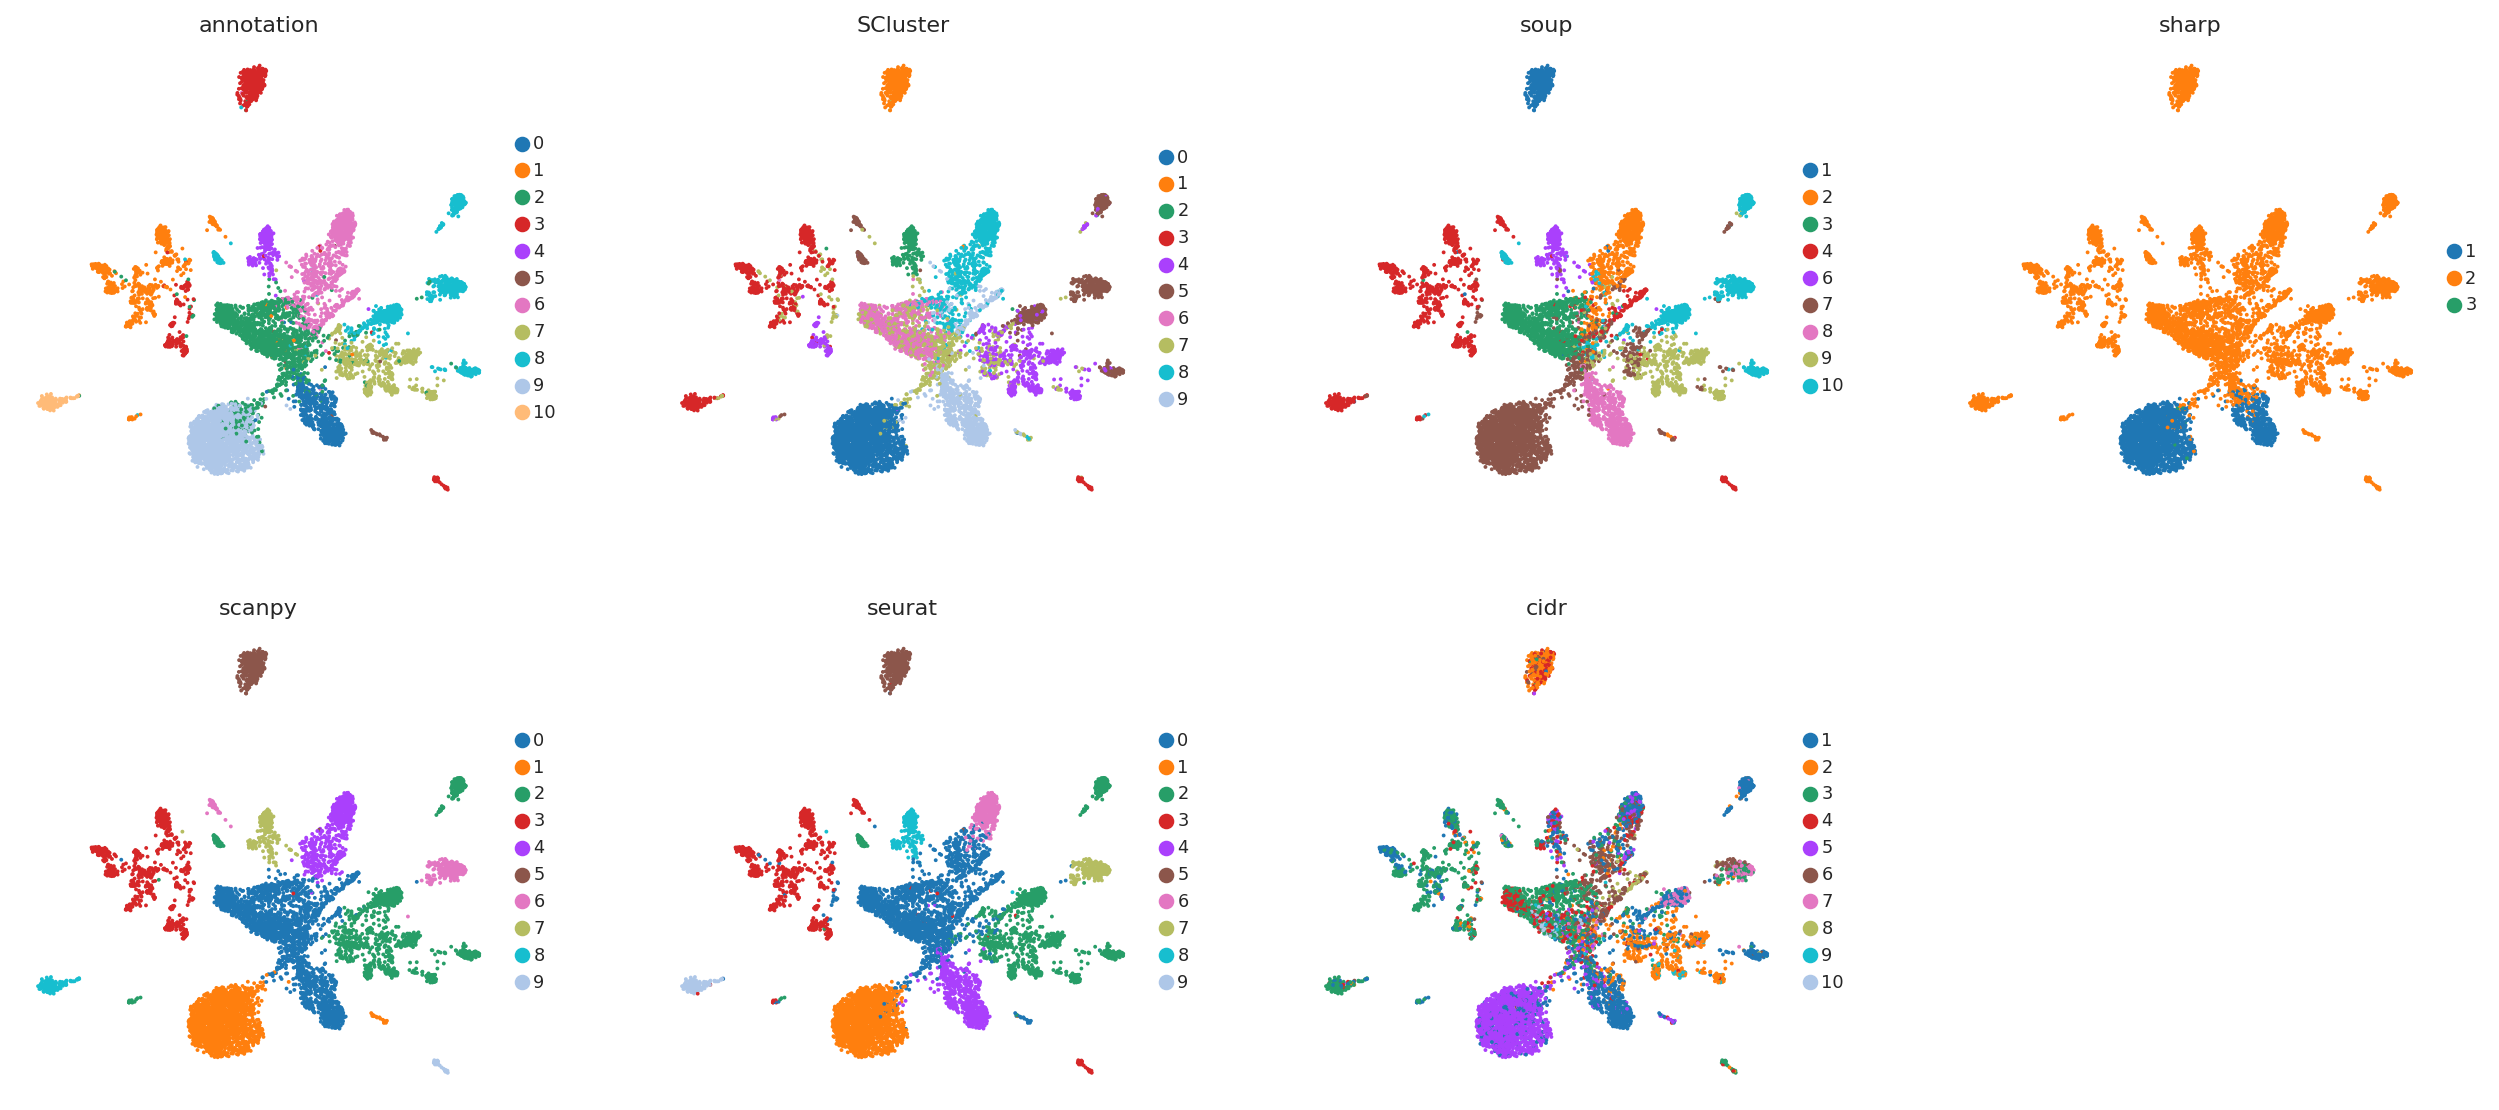

In [30]:
plt.rcParams['figure.dpi']=300
sc.set_figure_params(fontsize=10)
adata.obs['annotation']=adata.obs['annotation'].astype('category')
sc.pl.umap(adata,color=['annotation']+_methods,legend_fontsize=8,s=12,frameon=False)

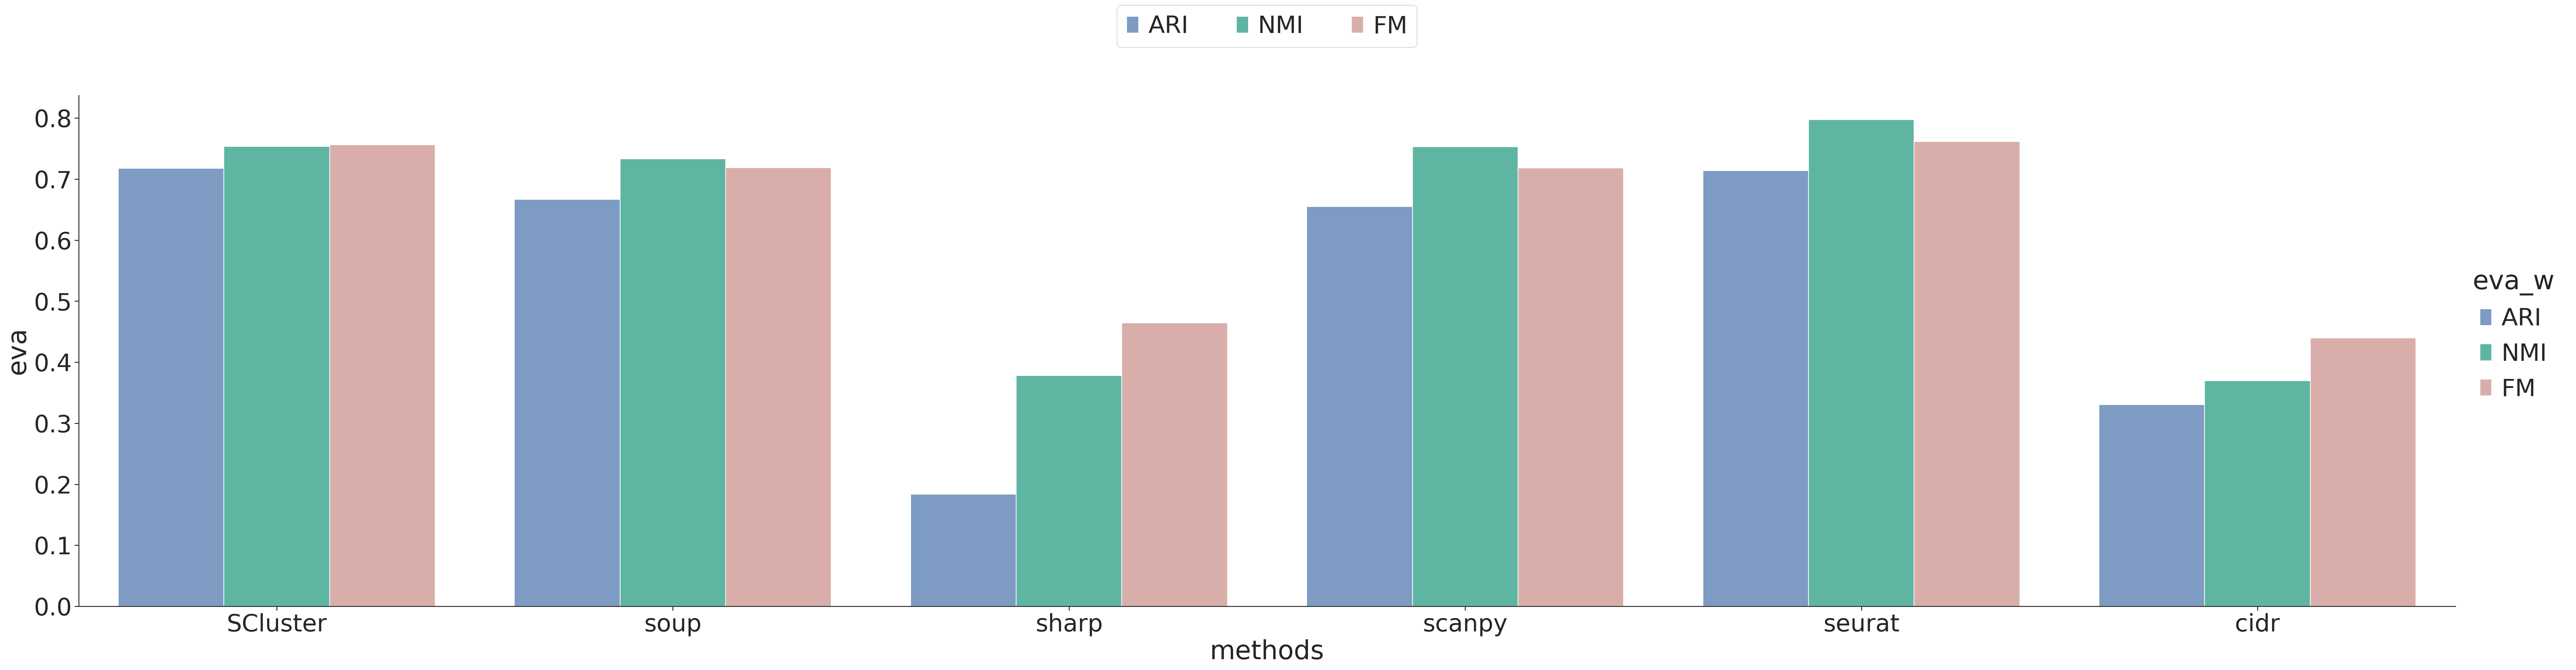

In [31]:
def tips(methods,eva):
    tip=pd.DataFrame()
    tip['eva']=eva
    tip['eva_w']=['ARI','NMI','FM']
    tip['methods']=[methods for _ in range(3)]
    return tip
data=[]
for i in zip(_methods,_eva):
    data.append(tips(i[0],i[1]))
data=pd.concat(data)

# sns.set(font_scale = 5)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params,font_scale = 3)
# Draw a nested barplot by species and sex
fig=sns.catplot(
    data=data, kind="bar",
    x="methods", y="eva", hue="eva_w",
    errorbar="sd", palette=['#7199cf', '#4fc4aa', '#e1a7a2'], height=12,aspect=4
)
plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.2), ncol=3)

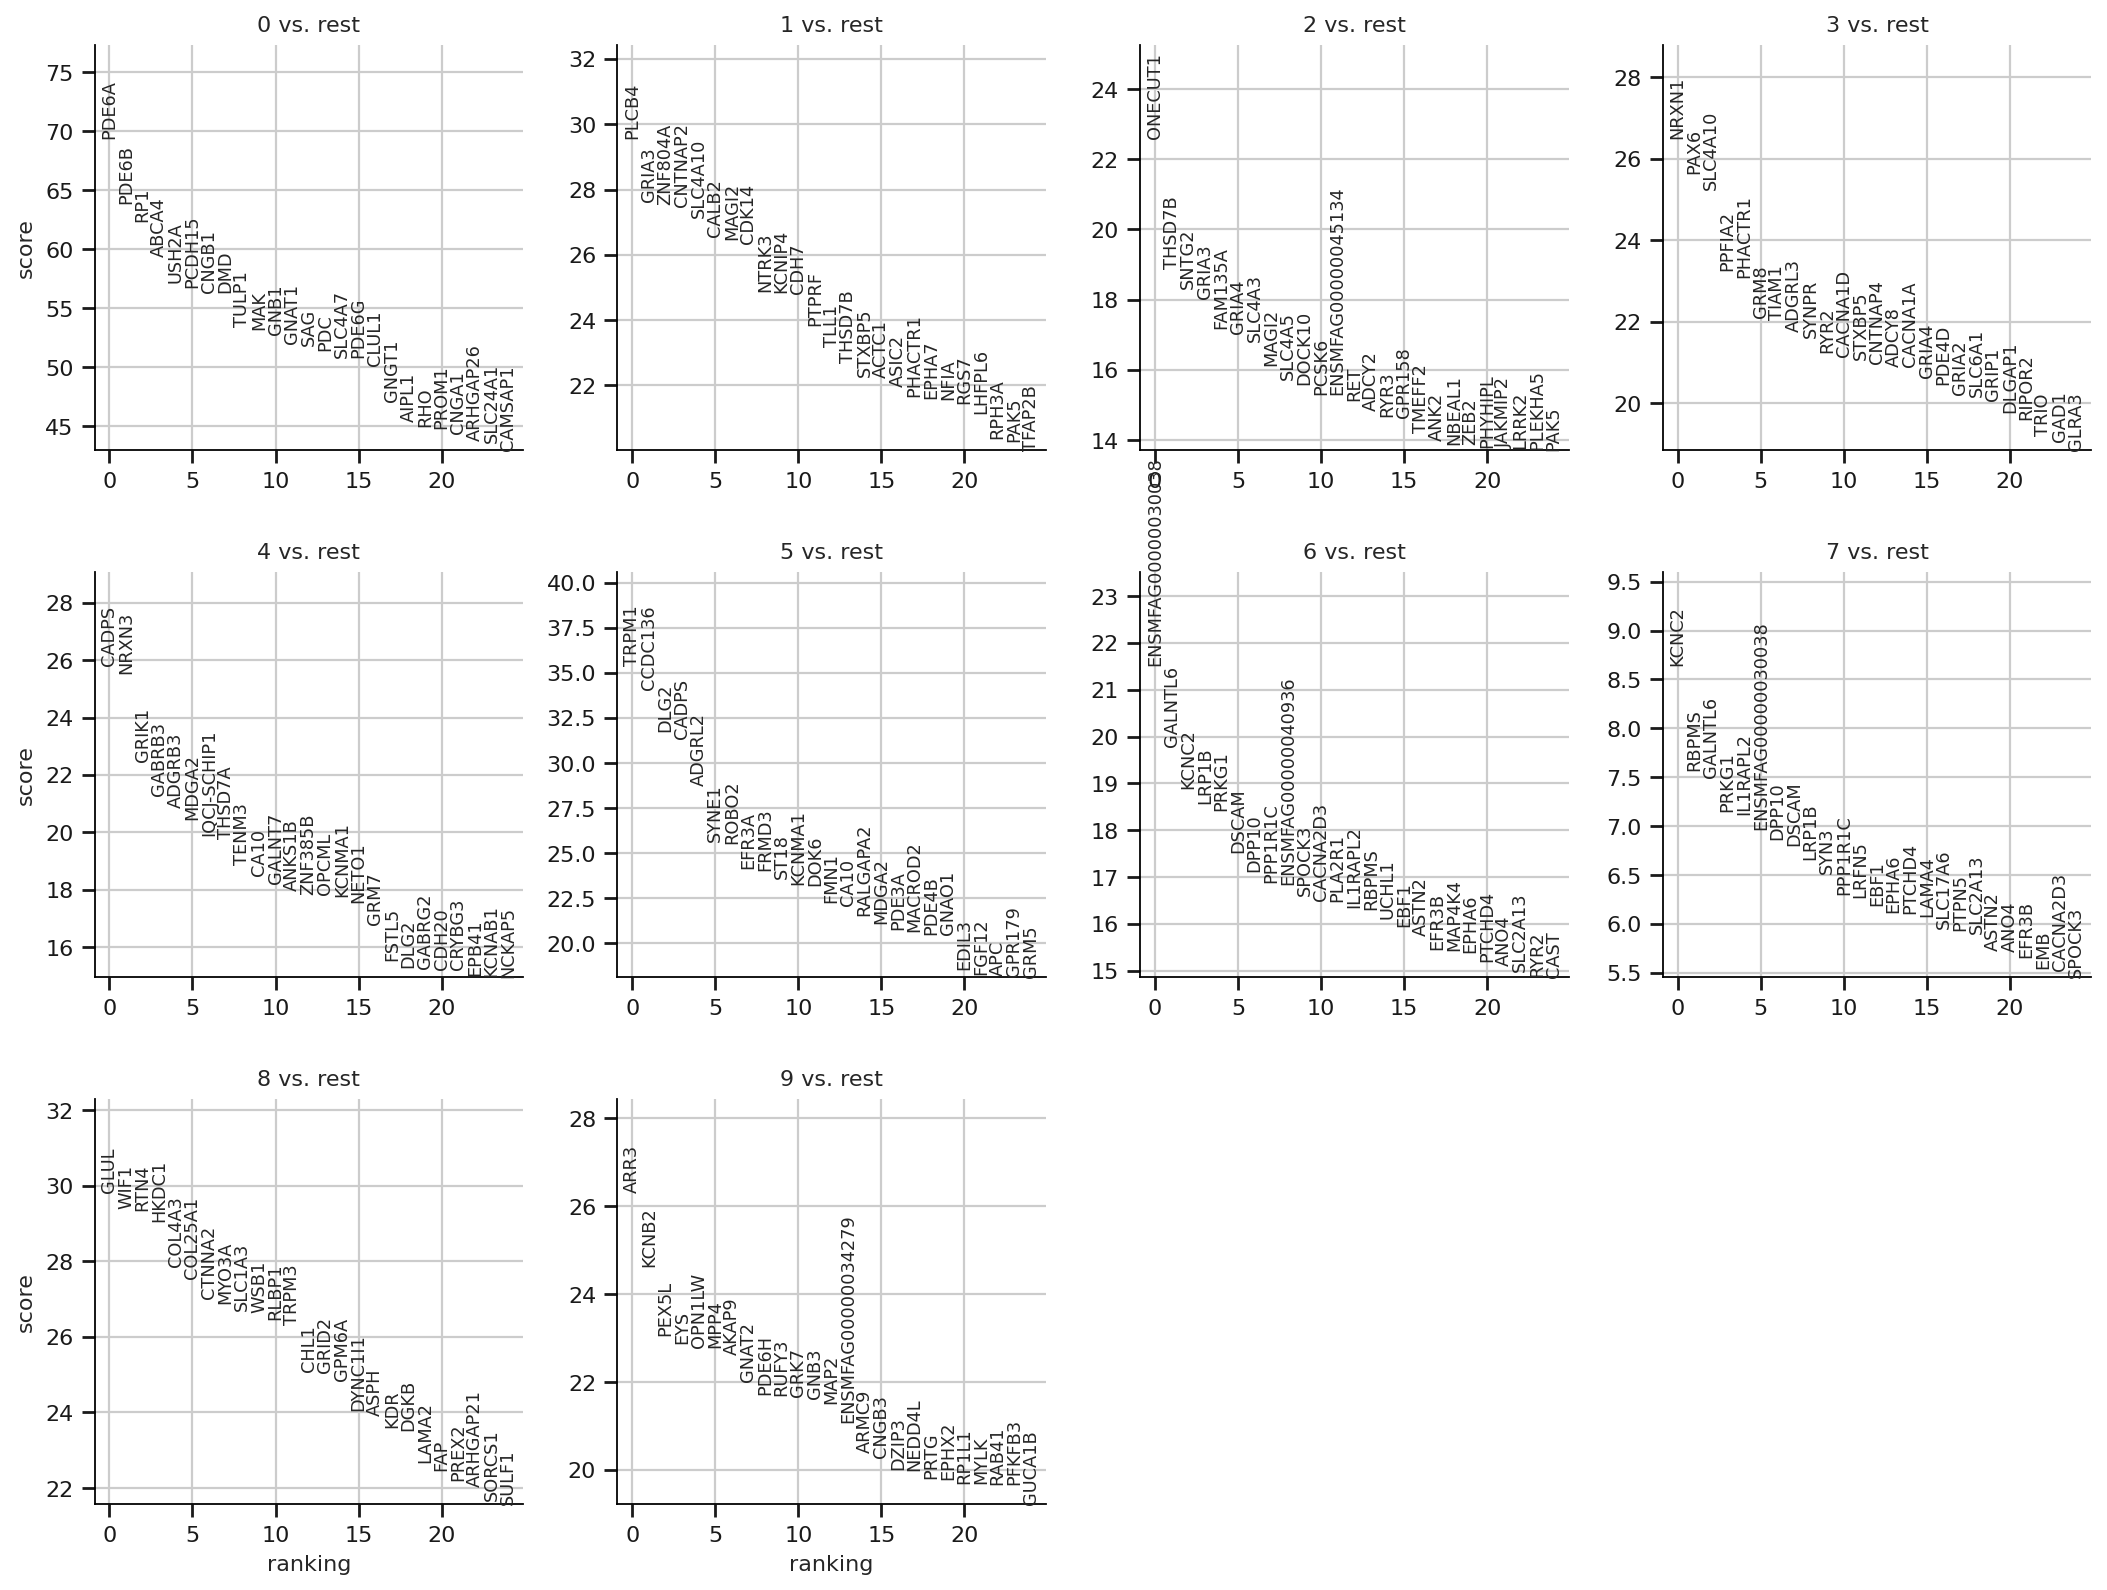

In [32]:
plt.rcParams['figure.dpi']=500
sc.set_figure_params(fontsize=10)
sc.tl.rank_genes_groups(adata, 'SCluster', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [33]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
maker=pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)
maker

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p,8_n,8_p,9_n,9_p
0,PDE6A,0.0,PLCB4,5.089518e-96,ONECUT1,3.907132e-57,NRXN1,9.117115e-112,CADPS,4.524455e-108,TRPM1,9.642514e-162,ENSMFAG00000030038,1.211096e-80,KCNC2,2.927051e-17,GLUL,4.881315e-129,ARR3,3.880821e-108
1,PDE6B,0.0,GRIA3,3.475018e-89,THSD7B,1.845821e-46,PAX6,4.787626e-105,NRXN3,5.959853e-105,CCDC136,1.029083e-154,GALNTL6,1.848475e-70,RBPMS,1.040499e-13,WIF1,2.509837e-126,KCNB2,3.146619e-98
2,RP1,0.0,ZNF804A,1.024556e-88,SNTG2,1.037386e-44,SLC4A10,3.160107e-104,GRIK1,1.050060e-85,DLG2,2.256851e-141,KCNC2,1.768214e-65,GALNTL6,1.717903e-13,RTN4,1.261975e-126,PEX5L,3.984772e-89
3,ABCA4,0.0,CNTNAP2,2.839763e-88,GRIA3,4.473068e-44,PPFIA2,3.744163e-91,GABRB3,3.405789e-79,CADPS,3.979010e-142,LRP1B,6.929101e-64,PRKG1,1.918427e-12,HKDC1,2.784589e-124,EYS,2.348780e-88
4,USH2A,0.0,SLC4A10,7.870621e-88,FAM135A,2.354488e-41,PHACTR1,5.611774e-90,ADGRB3,7.672682e-78,ADGRL2,2.864683e-123,PRKG1,4.722826e-63,IL1RAPL2,2.382924e-12,COL4A3,1.655764e-117,OPN1LW,2.045335e-87


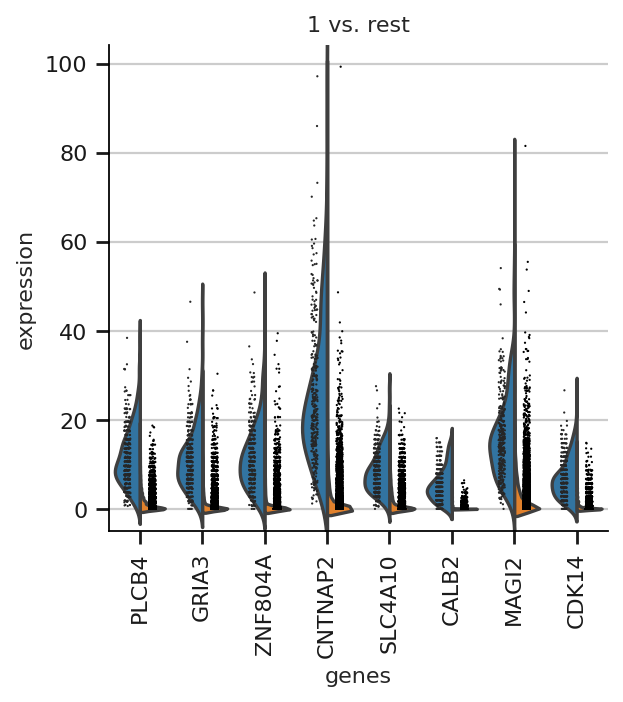

In [34]:
sc.pl.rank_genes_groups_violin(adata, groups=['1'], n_genes=8)